# **🗺️ Isochronic Map**

In this notebook, we generate images that represent the isochronic map of Switzerland. The isochronic map is a map that shows the travel time from a given point to other points in the map. The travel time is represented by the color of the pixel. Here, the pixel stores the number of seconds it takes to travel from the given point to the pixel's location.

In [30]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [31]:
import networkx as nx
import pandas as pd 
import sys
import os

path_to_preprocessing = os.path.join('..', '..', 'src')
sys.path.insert(0, path_to_preprocessing)

from analysis.isochronic_map import IsochronicMap

## **📊 Process the Data**

In [32]:
NODES_PATH = '../../data/processed/iso_nodes.csv'
EDGES_PATH = '../../data/processed/iso_edges.csv'

nodes = pd.read_csv(NODES_PATH)
edges = pd.read_csv(EDGES_PATH)

def add_xy_coordinates(nodes):
    STOPS_PATH = '../../data/processed/stops.csv'

    bav = pd.read_csv(STOPS_PATH)
    bav.drop(columns=[
        "x_fa2", 
        "y_fa2",
        "indegree",
        "outdegree",
        "degree",
        "betweenness_centrality",
    ], inplace=True)
    bav.rename(columns={
        "x_geo": "x",
        "y_geo": "y",
    }, inplace=True)

    nodes = nodes.merge(bav, left_on="id", right_on="stop_id", how="left")
    nodes = nodes[['id', 'x', 'y', 'lat', 'lon']]

    return nodes

nodes = add_xy_coordinates(nodes)
nodes.head()

id            x            y        lat       lon
0  8500010  8747.787053  1083.724166  47.547414  7.589564
1  8500016  8740.453774  1098.214087  47.570305  7.572525
2  8500020  8772.829603  1075.023376  47.533590  7.647892
3  8500021  8791.268213  1068.157330  47.522667  7.690815
4  8500022  8803.456157  1054.767116  47.501466  7.719104

## **🔢 Generate the Data**

In [33]:
isochronic_map = IsochronicMap(
    nodes, 
    edges,
    resolution=1000, 
    left_margin=20, 
    right_margin=50,
    top_margin=10,
    bottom_margin=0
    )

🌐 Created graph with 19_901 nodes and 110_649 edges.


In [34]:
isochronic_map.show_map()

Max time: 18.27 hours
Min time: 0.05 hours


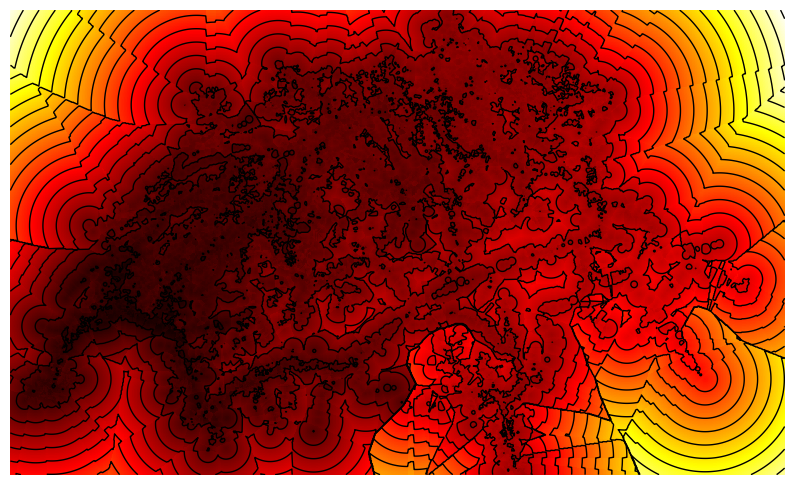

In [35]:
## NN isochronic map
node_id = 8501120 # Lausanne
iso_map_nn = isochronic_map.get_nn_isochronic_map_for_node_id(node_id)
isochronic_map.save_isochronic_map_for_node_id(iso_map_nn, node_id)
isochronic_map.show_isochronic_map_for_node_id(node_id, with_steps=True)

Max time: 18.27 hours
Min time: 0.00 hours


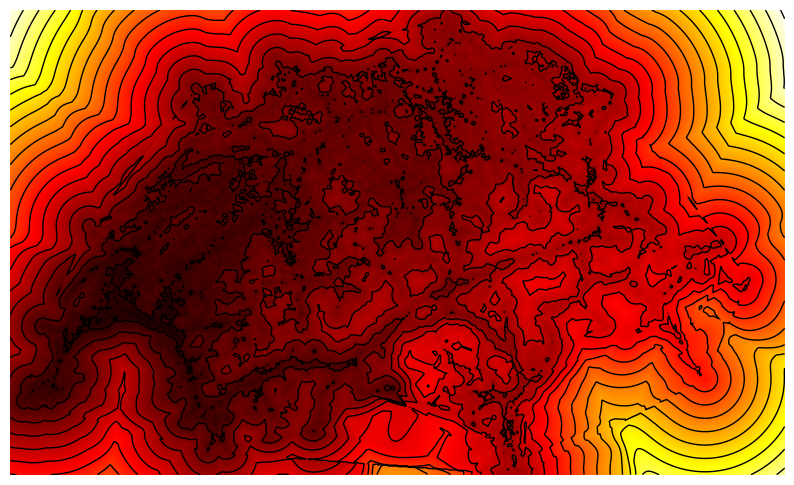

In [36]:
## LINEAR isochronic map
node_id = 8501120 # Lausanne
iso_map_lin = isochronic_map.get_linear_isochronic_map_for_node_id(node_id)
isochronic_map.save_isochronic_map_for_node_id(iso_map_lin, node_id)
isochronic_map.show_isochronic_map_for_node_id(node_id, with_steps=True, type="linear")

[[-2.03191462e+02 -2.02761574e+02 -2.01907010e+02 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [-2.05883991e+02 -2.05454015e+02 -2.04599257e+02 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [-2.11212251e+02 -2.10782186e+02 -2.09927208e+02 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 ...
 [-7.27595761e-12 -7.27595761e-12 -7.27595761e-12 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [-7.27595761e-12 -7.27595761e-12 -7.27595761e-12 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [-7.27595761e-12 -7.27595761e-12 -7.27595761e-12 ...  0.00000000e+00
   0.00000000e+00  1.45519152e-11]]


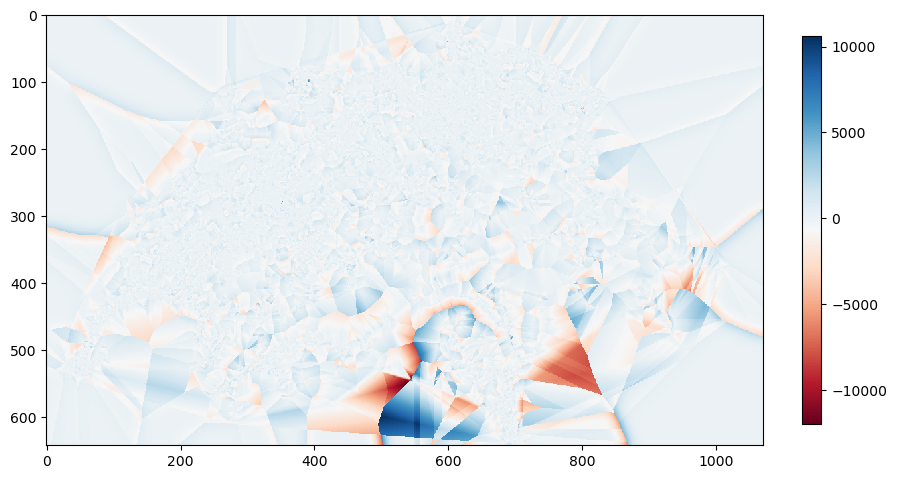

In [40]:
import matplotlib.pyplot as plt
import numpy as np

# Show difference between NN and LINEAR
diff_nn_linear = iso_map_nn - iso_map_lin
print(diff_nn_linear)
# rotate 90 degrees
diff_nn_linear = np.rot90(diff_nn_linear, k=1, axes=(0, 1))

# show using matplotlib, trilinear color
plt.figure(figsize=(10, 10))
plt.imshow(diff_nn_linear, cmap='RdBu', interpolation='nearest')
# small colorbar
plt.colorbar(fraction=0.025)
plt.show()

Max time: 18.27 hours
Min time: 0.00 hours


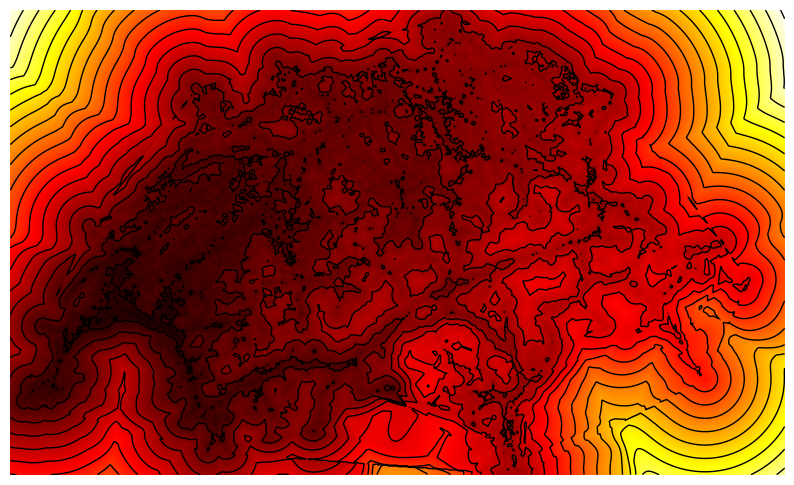

In [69]:
## LINEAR isochronic map
node_id = 8501120 # Lausanne
iso_map = isochronic_map.get_linear_isochronic_map_for_node_id(node_id)
isochronic_map.save_isochronic_map_for_node_id(iso_map, node_id)
isochronic_map.show_isochronic_map_for_node_id(node_id, with_steps=True, type="linear")

Max time: 17.29 hours
Min time: 0.11 hours


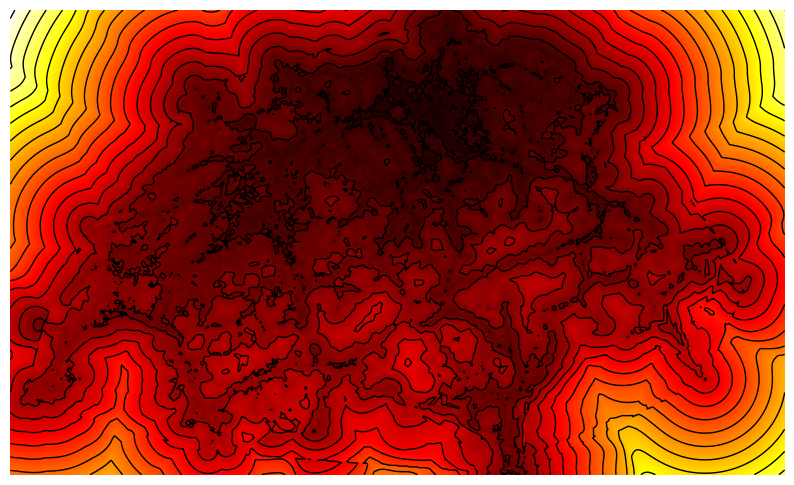

In [70]:
node_id = 8503000 # Zürich
iso_map = isochronic_map.get_linear_isochronic_map_for_node_id(node_id)
isochronic_map.save_isochronic_map_for_node_id(iso_map, node_id)
isochronic_map.show_isochronic_map_for_node_id(node_id, with_steps=True, type="linear")

Max time: 17.16 hours
Min time: 0.07 hours


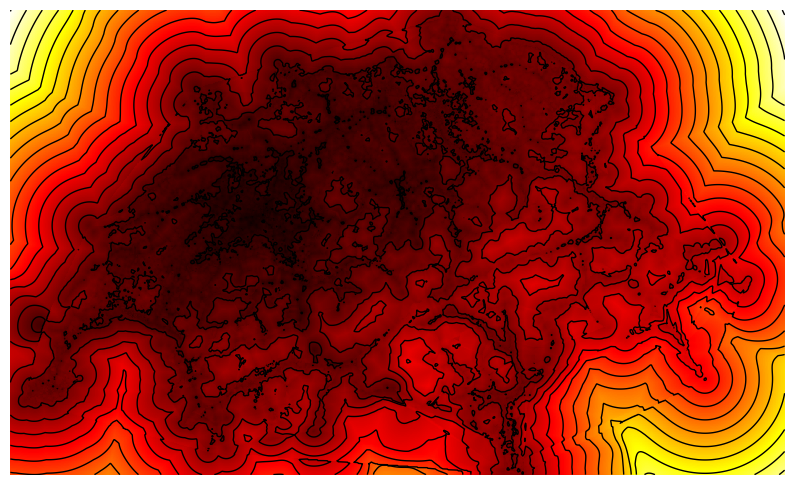

In [71]:
node_id = 8507000 # Bern
iso_map = isochronic_map.get_linear_isochronic_map_for_node_id(node_id)
isochronic_map.save_isochronic_map_for_node_id(iso_map, node_id)
isochronic_map.show_isochronic_map_for_node_id(node_id, with_steps=True, type="linear")

Max time: 17.09 hours
Min time: 0.11 hours


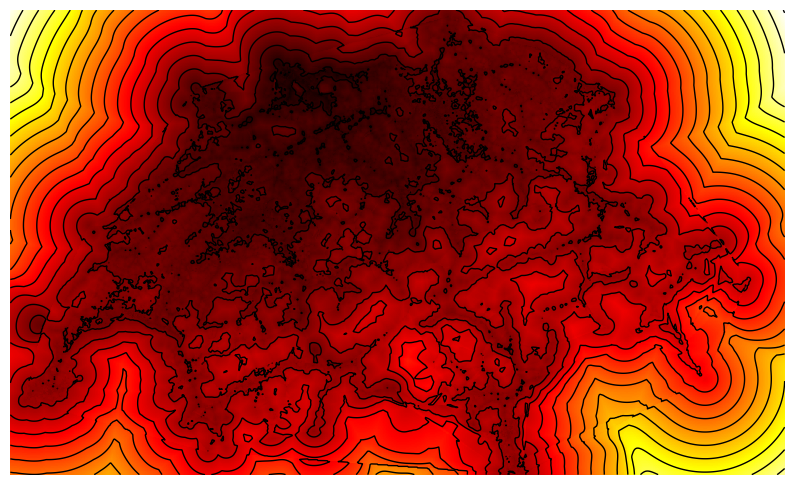

In [72]:
node_id = 8500010 # Basel
iso_map = isochronic_map.get_linear_isochronic_map_for_node_id(node_id)
isochronic_map.save_isochronic_map_for_node_id(iso_map, node_id)
isochronic_map.show_isochronic_map_for_node_id(node_id, with_steps=True, type="linear")

Max time: 19.22 hours
Min time: 0.10 hours


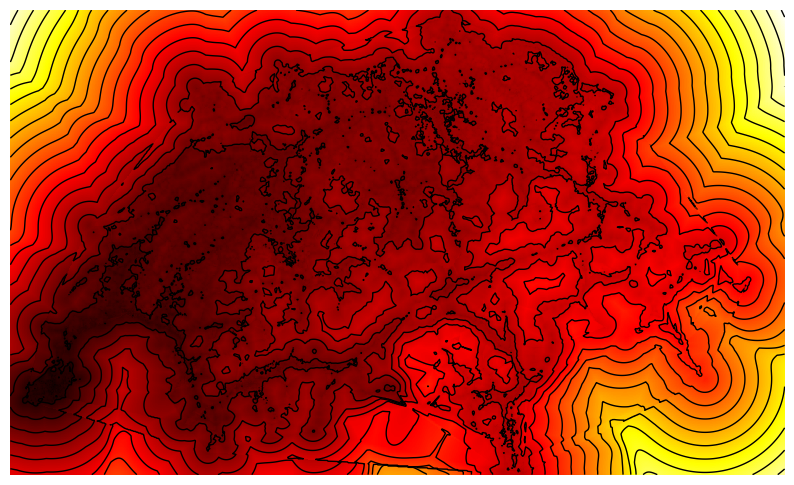

In [73]:
node_id = 8587057 # Genève
iso_map = isochronic_map.get_linear_isochronic_map_for_node_id(node_id)
isochronic_map.save_isochronic_map_for_node_id(iso_map, node_id)
isochronic_map.show_isochronic_map_for_node_id(node_id, with_steps=True, type="linear")

Max time: 18.26 hours
Min time: 0.00 hours


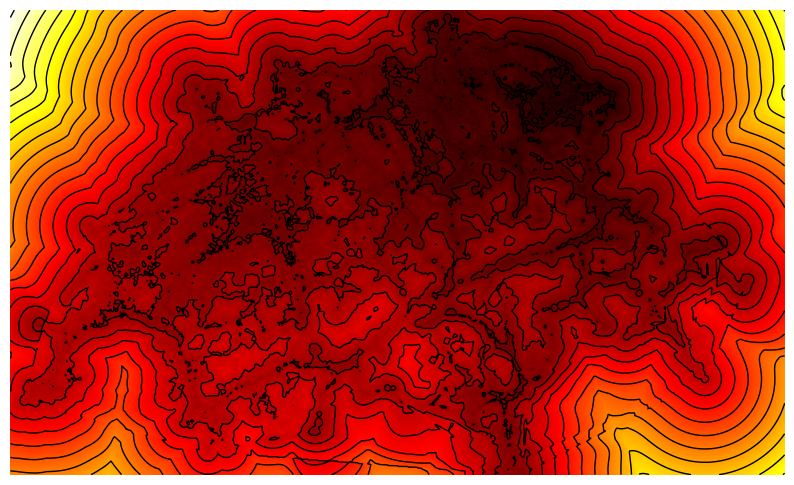

In [74]:
node_id = 8506302 # St. Gallen
iso_map = isochronic_map.get_linear_isochronic_map_for_node_id(node_id)
isochronic_map.save_isochronic_map_for_node_id(iso_map, node_id)
isochronic_map.show_isochronic_map_for_node_id(node_id, with_steps=True, type="linear")

Max time: 19.00 hours
Min time: 0.07 hours


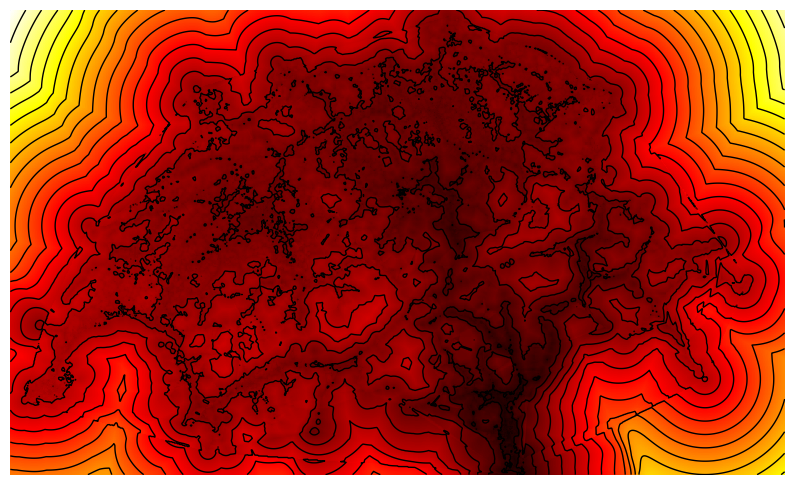

In [75]:
node_id = 8505300 # Lugano
iso_map = isochronic_map.get_linear_isochronic_map_for_node_id(node_id)
isochronic_map.save_isochronic_map_for_node_id(iso_map, node_id)
isochronic_map.show_isochronic_map_for_node_id(node_id, with_steps=True, type="linear")